# COIS3510 – Data Visualization Workshop 2

---

**Name:** Dikshith Reddy Macherla  
**Student ID:** 0789055  
**Course:** COIS3510 – Data Visualization  
**Date:** 14th October, 2025  

---

In [1]:
# Setup: imports used throughout the workshop
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates

## Basic Scatter Plot

We’ll start with a simple scatter plot using the x and y values provided in the workshop instructions.  
Goal: reproduce the basic scatter (no classes) and label axes for readability.:contentReference[oaicite:1]{index=1}:contentReference[oaicite:2]{index=2}


## Basic Scatter Plot

This is the simplest form of data visualization - plotting one variable against another.  
Here, we use the sample data from the workshop instructions to create a scatter plot using Matplotlib.

**Goal:**  
Display a basic scatter plot of `x` vs `y` values, label the axes, and add a title.  
This serves as the foundation for later plots that include more dimensions and classes.

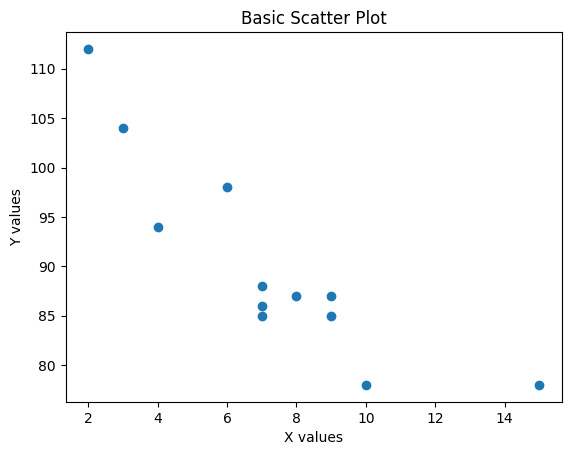

In [3]:
# Define the data
x = [6, 7, 8, 7, 2, 3, 9, 4, 10, 15, 9, 7]
y = [98, 85, 87, 88, 112, 104, 87, 94, 78, 78, 85, 86]

# Create the scatter plot
plt.figure()
plt.scatter(x, y)

# Add labels and a title
plt.title("Basic Scatter Plot")
plt.xlabel("X values")
plt.ylabel("Y values")

# Display the plot
plt.show()

## Scatter Plot with Multiple Classes

Now we’ll create a scatter plot using the **Iris dataset**, which contains measurements for three species of flowers: *setosa*, *versicolor*, and *virginica*.

**Goal:**  
Visualize the relationship between `petal_length` and `petal_width` while distinguishing species using color and style.  
We’ll use Seaborn’s `scatterplot()` function for better aesthetics and automatic legend creation.

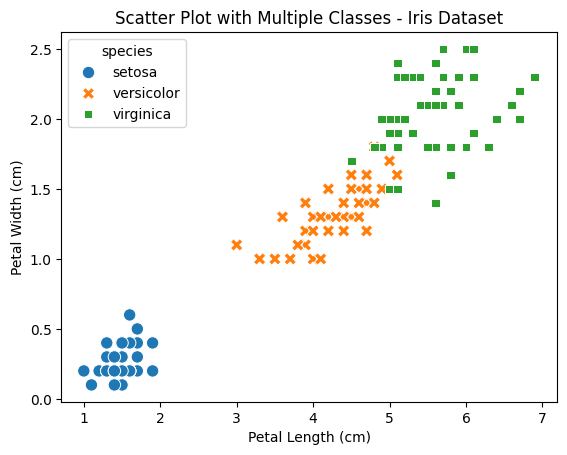

In [6]:
# Load the iris dataset
iris = sns.load_dataset('iris')

# Create scatter plot with species as color and style
sns.scatterplot(
    x='petal_length',
    y='petal_width',
    hue='species',
    style='species',
    data=iris,
    s=80  # size of points
)

# Title and labels
plt.title("Scatter Plot with Multiple Classes - Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()


## Scatter Plot with 4 Dimensional Data

We can add more dimensions to a 2D scatter plot by encoding extra variables using **color** and **point size**.  

**Goal:**  
Use the Iris dataset to create a scatter plot showing:
- X-axis → Sepal Length  
- Y-axis → Sepal Width  
- Color → Species  
- Point Size → Petal Length  

This allows us to visually encode four dimensions of data in one chart.


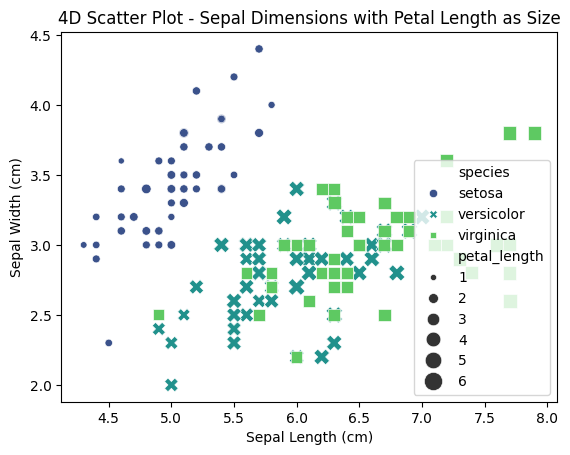

In [7]:
# Create a scatter plot with 4 dimensions using Seaborn
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    hue='species',          # color
    size='petal_length',    # size
    data=iris,
    sizes=(20, 200),        # min and max point sizes
    style='species',
    palette='viridis'
)

# Title and labels
plt.title("4D Scatter Plot - Sepal Dimensions with Petal Length as Size")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()


## Scatter Plot Matrix (Pairplot)

A **scatter plot matrix** displays pairwise scatter plots for all numerical variables in a dataset.  
It’s useful for exploring relationships between multiple variables at once.

**Goal:**  
Use Seaborn’s `pairplot()` to visualize the relationships among sepal and petal measurements in the Iris dataset.

Each diagonal cell shows the distribution of one variable, while the off-diagonal cells show scatter plots between variable pairs.

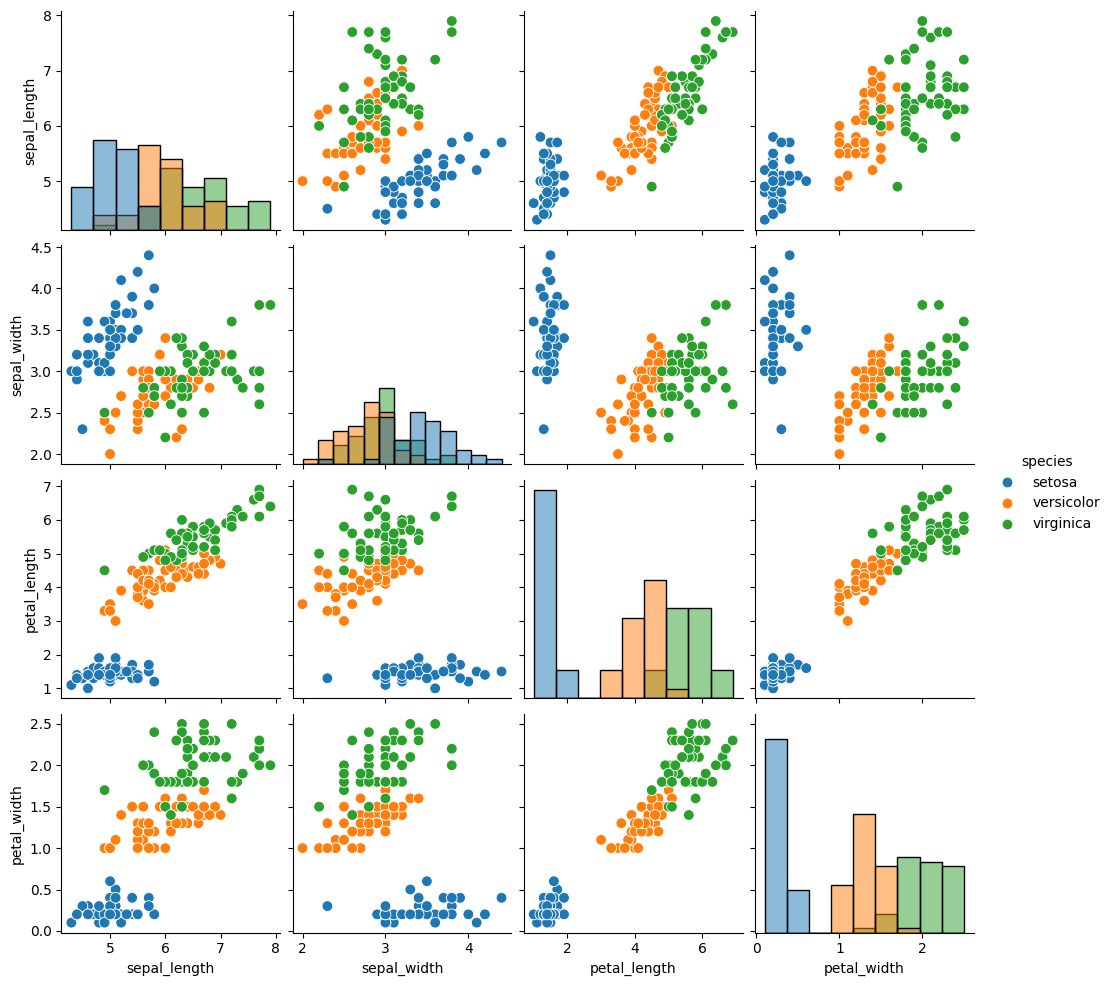

In [9]:
# Create a scatter plot matrix (pairplot)
sns.pairplot(
    iris,
    diag_kind='hist',   # use histograms on the diagonal
    hue='species',      # color points by species
    plot_kws={'s': 60}  # size of scatter points
)

# Show the plot
plt.show()

## Scatter Plot Lattice (Faceted Plot)

A **scatter plot lattice** (or **faceted scatter plot**) displays multiple scatter plots,  
each for a subset of data — in this case, one for each species of the Iris dataset.

**Goal:**  
- Plot `petal_length` vs `sepal_length`  
- Create one subplot (facet) per species  
- Add a smooth trend line in each facet  

We’ll use Seaborn’s `lmplot()` to achieve this lattice-style visualization.


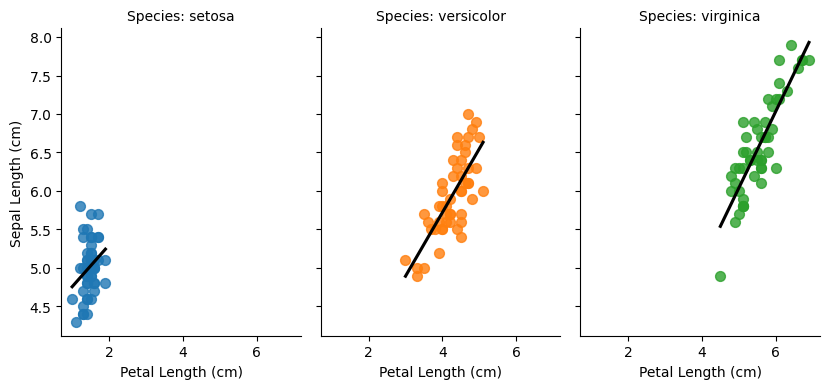

In [11]:
# Create a faceted scatter plot lattice with regression lines
g = sns.lmplot(
    x='petal_length',
    y='sepal_length',
    col='species',       # separate plots by species
    hue='species',
    data=iris,
    height=4,
    aspect=0.7,
    scatter_kws={'s': 50},    # size of scatter points
    line_kws={'color': 'black'},  # regression line color
    ci=None                   # disable confidence interval shading
)

# Labels and titles
g.set_axis_labels("Petal Length (cm)", "Sepal Length (cm)")
g.set_titles("Species: {col_name}")

plt.show()


## Parallel Axis Plot

A **Parallel Axis Plot** visualizes multi-dimensional data by drawing each observation as a line  
that passes through parallel vertical axes, one for each feature.

**Goal:**  
Plot the Iris dataset across its four numeric features  
(`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`)  
and color the lines by `Species`.

We’ll use **Pandas**’ built-in `parallel_coordinates()` function.


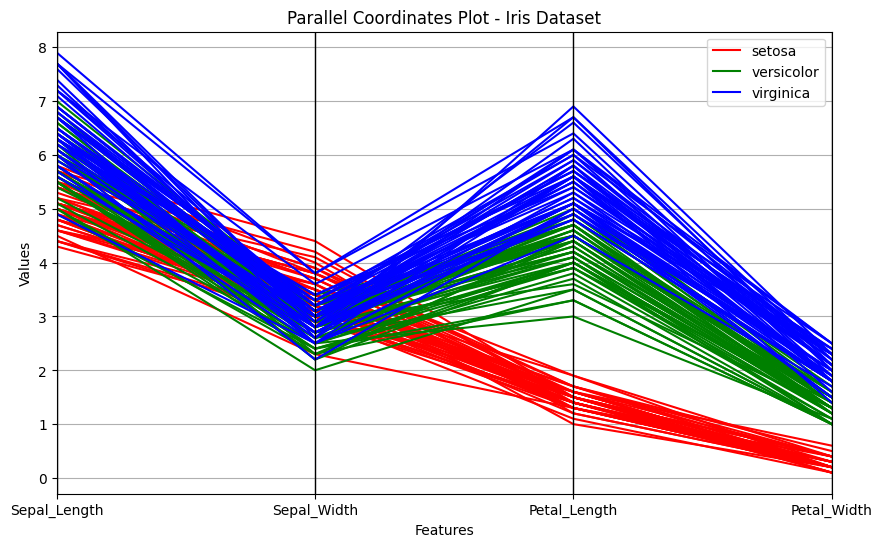

In [15]:
# Load the Iris dataset (ensure it has column names matching the workshop)
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/iris.csv"
iris_full = pd.read_csv(url)

iris_full.rename(columns={
    'Sepal.Length': 'Sepal_Length',
    'Sepal.Width': 'Sepal_Width',
    'Petal.Length': 'Petal_Length',
    'Petal.Width': 'Petal_Width'
}, inplace=True)

# Create the parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(
    iris_full,
    'Species',
    cols=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'],
    color=['r', 'g', 'b']
)

# Title and axis labels
plt.title("Parallel Coordinates Plot - Iris Dataset")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


## Chernoff Faces

**Chernoff Faces** use human facial features (eyes, mouth, nose, etc.) to represent multiple variables at once.  
Each feature of the face corresponds to a variable, allowing us to "see" patterns in the data.

**Goal:**  
Generate Chernoff Faces for the **Longley** dataset to visualize multivariate relationships.

**Setup Notes:**
- You may need to install the `ChernoffFace` library:

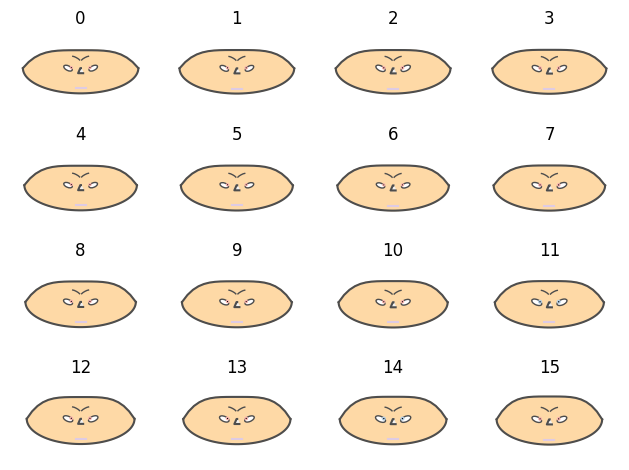

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from ChernoffFace import chernoff_face

# Load the Longley dataset from the workshop URL
url = "https://github.com/vincentarelbundock/Rdatasets/raw/master/csv/datasets/longley.csv"
data = pd.read_csv(url)

# Generate Chernoff faces
fig = chernoff_face(
    data=data,
    titles=[str(x) for x in list(range(len(data)))],
    color_mapper=plt.cm.Pastel1
)

# Display the faces
fig.tight_layout()
plt.show()

## Radar Chart (Spider Plot)

A **radar chart** (or **spider chart**) displays multivariate data in a circular layout.  
Each variable is represented as a spoke, and values are plotted along these axes.

**Goal:**  
- Create a radar chart showing values for several variables.
- Customize the grid, colors, and fill.
- Compare multiple groups on the same chart.

We’ll use **Matplotlib** and **NumPy** to build this visualization.


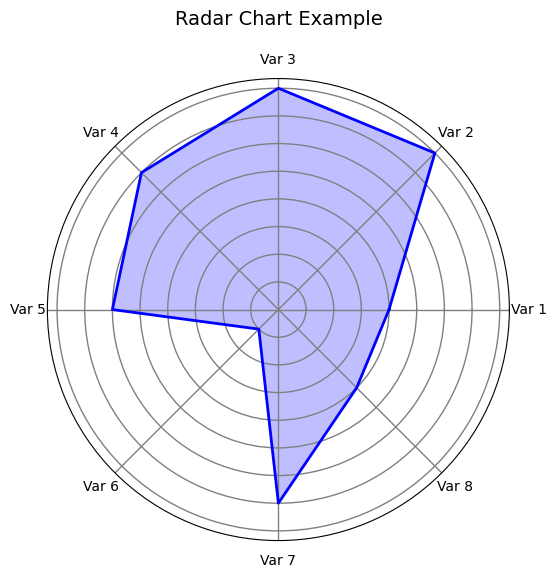

In [20]:
# Define the labels for the radar chart
labels = ['Var 1', 'Var 2', 'Var 3', 'Var 4', 'Var 5', 'Var 6', 'Var 7', 'Var 8']
num_vars = len(labels)

# Generate random data for one example observation
data = [np.random.randint(0, 11) for _ in range(num_vars)]
data += data[:1]  # close the loop

# Calculate the angle for each axis in radians
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw grid lines
ax.spines['polar'].set_visible(True)
ax.grid(color='gray', linestyle='-', linewidth=1)

# Plot the data
ax.plot(angles, data, color='blue', linewidth=2, linestyle='-')
ax.fill(angles, data, color='blue', alpha=0.25)

# Remove radial labels
ax.set_yticklabels([])

# Set axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add title
plt.title("Radar Chart Example", size=14, pad=20)
plt.show()
